# Random-Forest Structure-Property Model

In [1]:
import sys, os
import pandas as pd
import numpy as np

from rdkit import Chem

sys.path.append('../../Woodward_Fieser_Rules-main/src/')
import chromopredict as cp

In [2]:
d_kang = {
    'E01': {'smiles': 'C=CC(=O)C', 'nm_exp': 214},
    'E02': {'smiles': 'C=CC(=O)CCCCCCCCCC', 'nm_exp': 212},
    'E03': {'smiles': 'C=CC(=O)CC1CCCCC1', 'nm_exp': 213},
    'E04': {'smiles': 'C=CC(=O)CC1=CC=CC=C1', 'nm_exp': 210},
    'E05': {'smiles': 'C=CC(=O)C1CCCCC1', 'nm_exp': 212},
    'E06': {'smiles': 'C=CC(=O)C1CCC2(CC1)OCCO2', 'nm_exp': 214},
    'E07': {'smiles': 'C=CC(=O)C1CCCCCC1', 'nm_exp': 212.5},
    'E08': {'smiles': 'C=C1CCCC1=O', 'nm_exp': 231},
    'E09': {'smiles': 'C=C1CCCCC1=O', 'nm_exp': 230},
    'E10': {'smiles': 'C=C1CCCCCC1=O', 'nm_exp': 230},
    'E11': {'smiles': 'C=C1C[C@H]2[C@@H]3CC[C@@H]4C[C@@H](CC[C@]4(C)[C@H]3C(=O)C[C@]2(C)C1=O)OC(=O)C', 'nm_exp': 228},
    'E12': {'smiles': 'C=C1C[C@H]2[C@@H]3CC[C@@H]4C[C@@H](CC[C@]4(C)[C@H]3[C@H](C[C@]2(C)C1=O)O)O', 'nm_exp': 227},
    'E13': {'smiles': 'C1CCC(=C2CCCC2=O)C1', 'nm_exp': 259},
    'E14': {'smiles': 'C1CCC(=C2CCCCC2=O)CC1', 'nm_exp': 257},
    'E15': {'smiles': 'CCCCCCCC[C@H]1CC(=O)C2=C3CC[C@H]4C[C@H](CC[C@]4(C)[C@H]3CC[C@]12C)OC(=O)C', 'nm_exp': 257},
    'E16': {'smiles': 'CCCCCCCC[C@H]1C[C@H](C2=C3[C@H](CC[C@]12C)[C@@]4(C)CC[C@@H](C[C@@H]4CC3=O)OC(=O)C)OC(=O)C', 'nm_exp': 256},
    'E17': {'smiles': 'CCCCCCCC[C@H]1C[C@@H](C2=C3[C@H](CC[C@]12C)[C@@]4(C)CC[C@@H](C[C@@H]4CC3=O)OC(=O)C)OC(=O)C', 'nm_exp': 257},
    'E18': {'smiles': 'CC(=O)C1=C(C)CCCC1', 'nm_exp': 247},
    'E19': {'smiles': 'CC(C)=C1CCC(C)CC1=O', 'nm_exp': 252},
    'E20': {'smiles': 'CC1=CC(=O)CC(C)(C)C1', 'nm_exp': 235},
    'E21': {'smiles': 'CC1=C2CCCCC2CCC1=O', 'nm_exp': 239},
    'E22': {'smiles': 'CC=CC=CC=O', 'nm_exp': 261},
    'E23': {'smiles': 'CC(=O)C=CC1=C(C)CCCC1(C)C', 'nm_exp': 283},
    'E24': {'smiles': 'CC(=C1CCCCC1)C(=O)C', 'nm_exp': 242},
    'E25': {'smiles': 'C[C@@H]1CCC(=C(C)C)C(=O)C1', 'nm_exp': 252},
    'E26': {'smiles': 'C[C@H](CCCC(C)C)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4=C(C(=O)CC[C@]34C)Br)C', 'nm_exp': 256},
    'E27': {'smiles': 'CC12CCC(=O)C(Br)=C1CC[C@@H]1[C@@H]2CC[C@]2(C)C(=O)CC[C@@H]12', 'nm_exp': 254},
    'E28': {'smiles': 'CC=CC=CC=CC(=O)O', 'nm_exp': 297},
}

for idx, d_ in d_kang.items():
    smi = d_['smiles']
    if smi != '':
        d_['nm_wf'], _, _ = cp.predict(smi, solvent=None, verbose=False, draw=False, chromlib='woodward')
        d_['nm_wfe'], _, _ = cp.predict(smi, solvent=None, verbose=False, draw=False, chromlib='woodward_extended')
        d_['nm_wfr'], _, d_['im'] = cp.predict(smi, solvent=None, verbose=False, draw=False, chromlib='woodward_refine')
        #print(descr)

df_inference = pd.DataFrame.from_dict(d_kang, orient='index')
df_inference.head(n=5)

,smiles,nm_exp,nm_wf,nm_wfe,nm_wfr,im
E01,C=CC(=O)C,214.0,215,213,212,<PIL.PngImagePlugin.PngImageFile image mode=RG...
E02,C=CC(=O)CCCCCCCCCC,212.0,215,213,212,<PIL.PngImagePlugin.PngImageFile image mode=RG...
E03,C=CC(=O)CC1CCCCC1,213.0,215,213,212,<PIL.PngImagePlugin.PngImageFile image mode=RG...
E04,C=CC(=O)CC1=CC=CC=C1,210.0,305,245,302,<PIL.PngImagePlugin.PngImageFile image mode=RG...
E05,C=CC(=O)C1CCCCC1,212.0,215,213,212,<PIL.PngImagePlugin.PngImageFile image mode=RG...


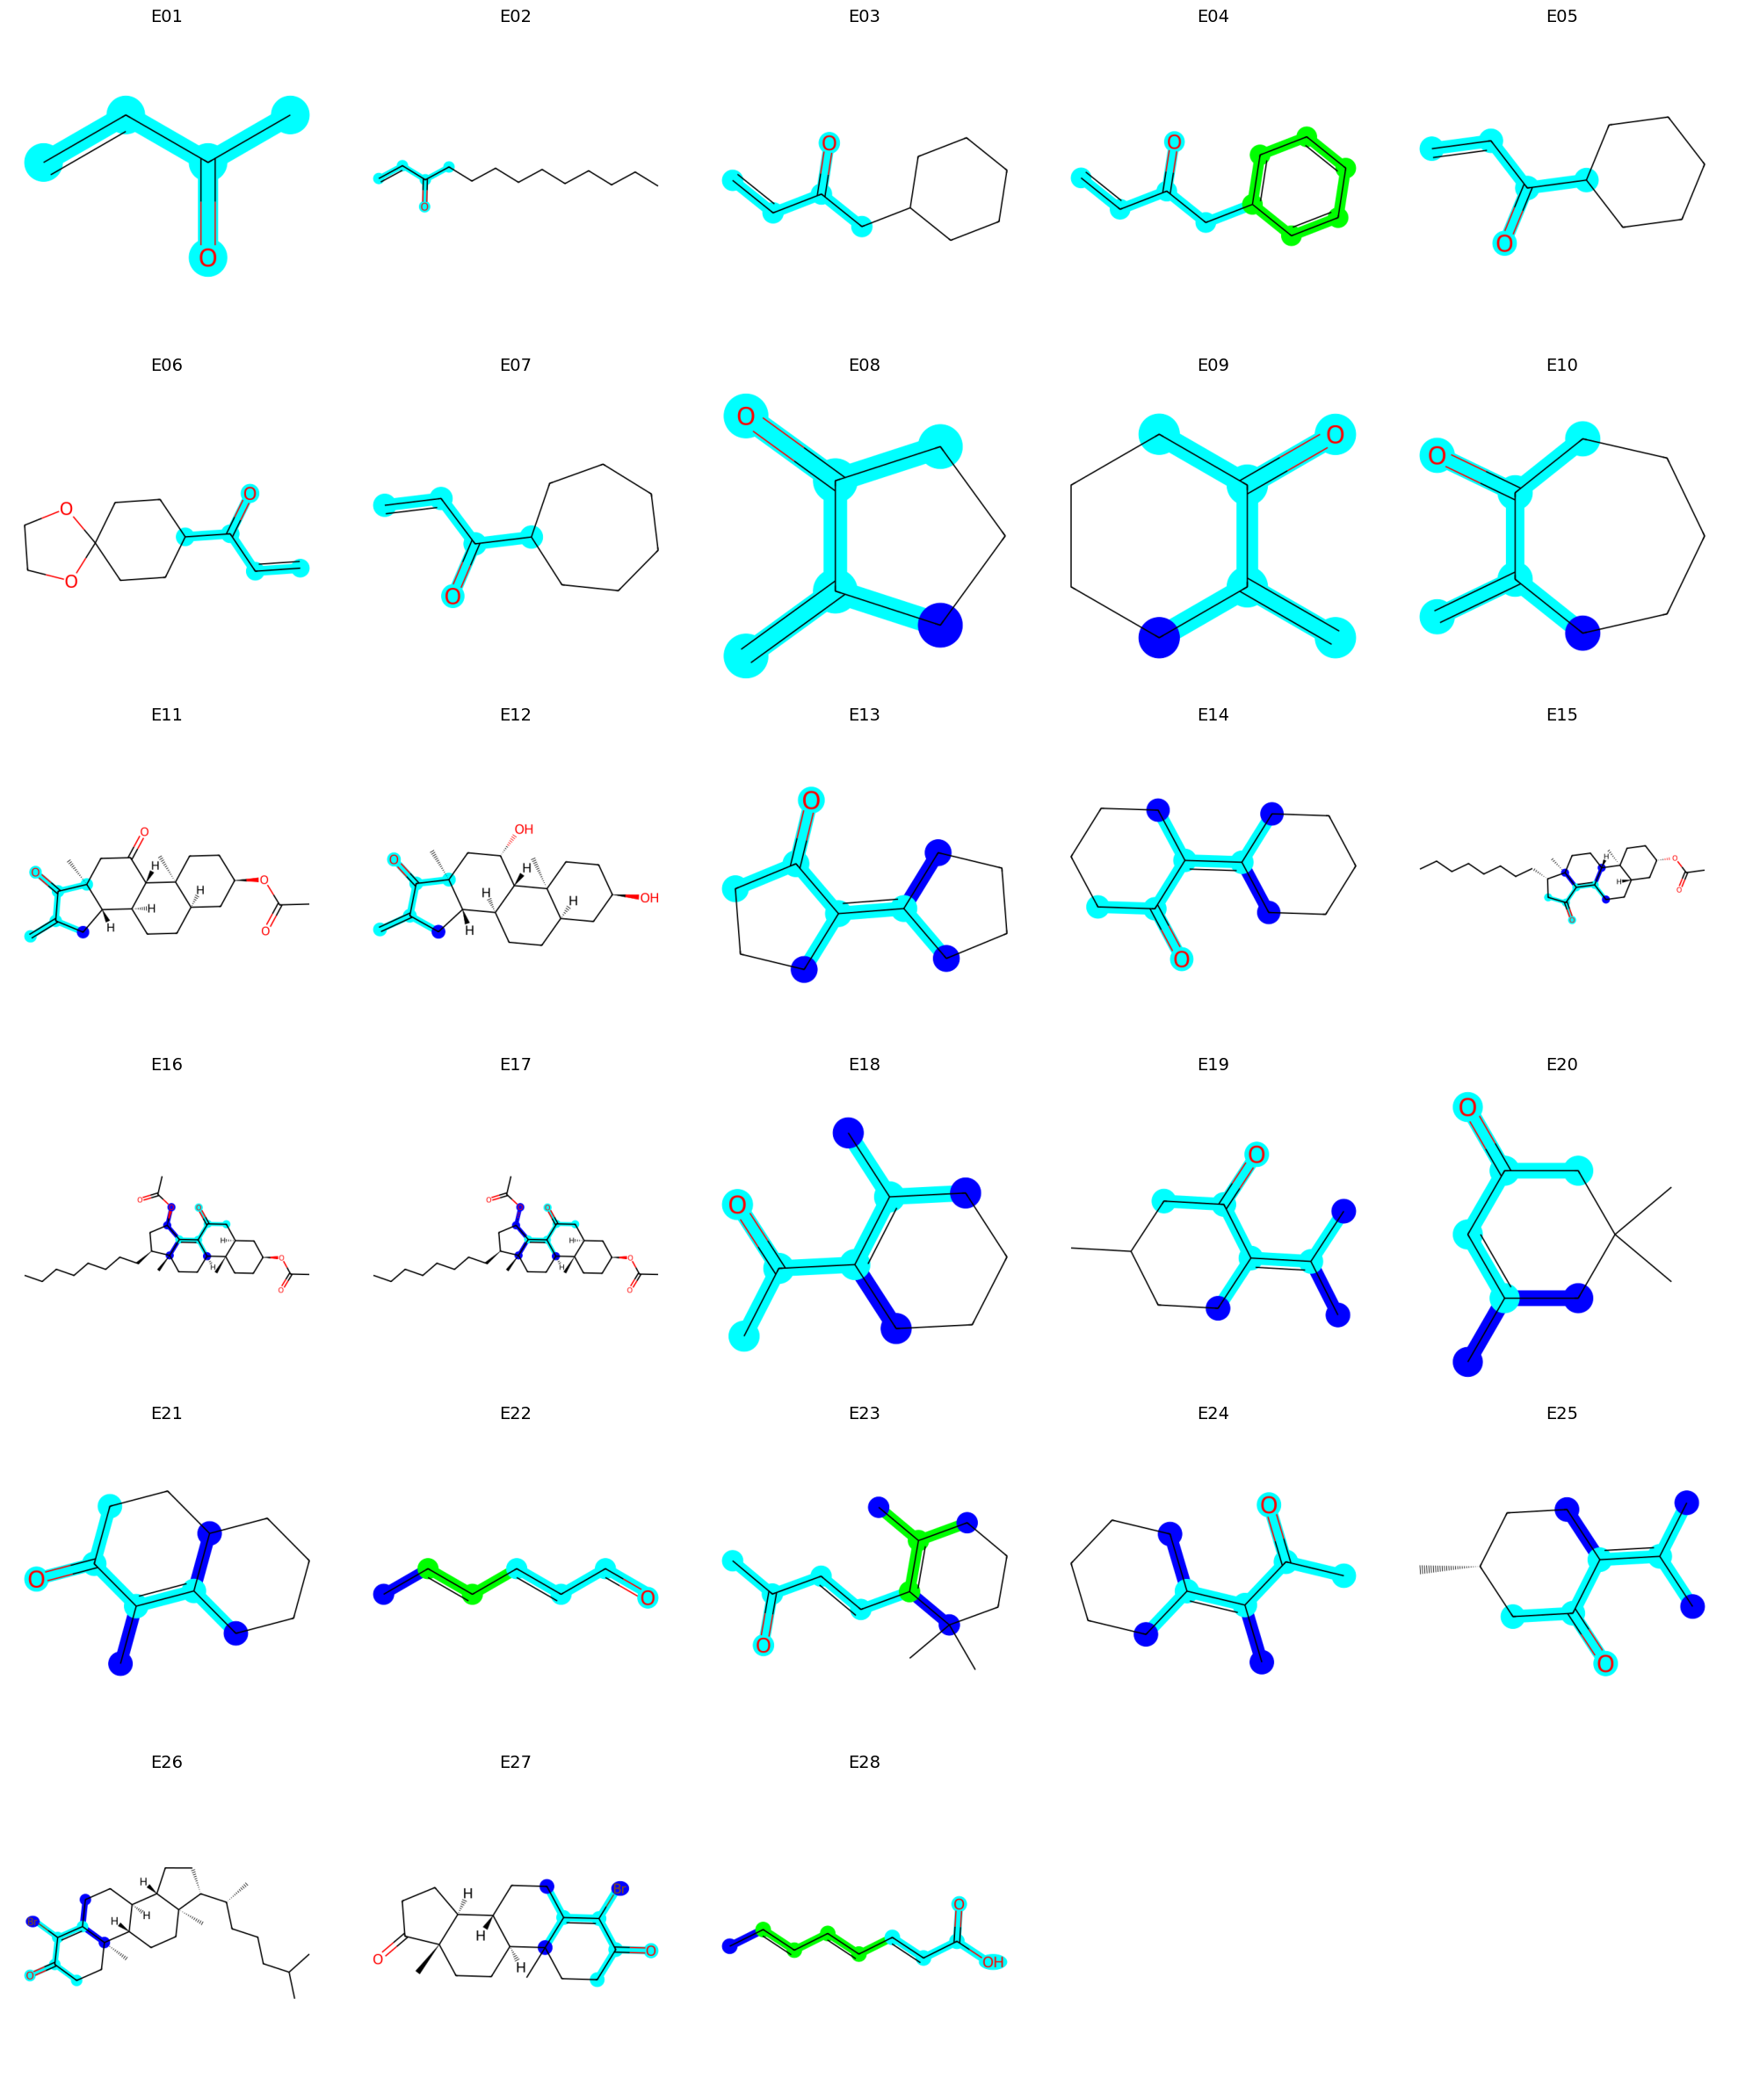

In [3]:
import matplotlib.pyplot as plt

images = df_inference['im'].tolist()
captions = df_inference.index.tolist()
cols = 5
rows = (len(images) + cols - 1) // cols

# Increase figsize for better resolution (e.g., 4 inches per image)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

for i, (img, caption) in enumerate(zip(images, captions)):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.imshow(img)
    ax.set_title(str(caption), fontsize=14)
    ax.axis('off')

for j in range(i + 1, rows * cols):
    r, c = divmod(j, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis('off')

plt.tight_layout()

# Save with higher DPI (e.g., 300)
plt.savefig("gridview_enones_test.pdf", dpi=300)

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

def featurize(smiles, radius, fp_size):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(fp_size)
    
    fmgen = rdFingerprintGenerator.GetMorganGenerator(
        radius=radius,
        fpSize=fp_size,
        atomInvariantsGenerator=rdFingerprintGenerator.GetMorganFeatureAtomInvGen()
    )
    
    fp = fmgen.GetFingerprint(mol)
    
    return np.array(fp)

def get_morgan_fp_data(df, radius=2, fp_size=1024):

    fp_array = np.stack(df['smiles'].map(lambda smi: featurize(smi, radius, fp_size)))
    X = pd.DataFrame(fp_array, columns=[f'fp_{i}' for i in range(fp_array.shape[1])])
    y = df['nm_b3lyp']

    return X, y


def flatten_and_deduplicate(lst):
    if not lst:
        return []
    # Flatten the list (handling both flat and nested)
    flat = [item for sublist in lst for item in (sublist if isinstance(sublist, list) else [sublist])]
    # Remove duplicates while preserving order
    seen = set()
    return [x for x in flat if not (x in seen or seen.add(x))]


def pattern_matches(smiles, smarts=['[#6]C(=O)[#8,#6,#1]',
                                    '[#6,#8,#1]C([#6,#8,#1])=C([#6,#8,#1])C(=O)[#8,#6,#1]',
                                   '[#6,#8,#1]C([#6,#8,#1])=C([#6,#8,#1])C([#6,#8,#1])=C([#6,#8,#1])C(=O)[#8,#6,#1]']):

    mol = Chem.MolFromSmiles(smiles)

    matches = []
    for pattern in smarts:
        mol_pattern = Chem.MolFromSmarts(pattern)
        matches.append([x[0] for x in mol.GetSubstructMatches(mol_pattern)])

    matches_flat = flatten_and_deduplicate(matches)

    ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)

    ao = rdFingerprintGenerator.AdditionalOutput()
    ao.AllocateBitPaths()
    
    fp = ttgen.GetFingerprint(mol,fromAtoms=matches_flat,additionalOutput=ao)

    return np.array(fp)

def get_rooted_fp_data(df):
    
    fp_array = np.stack(df['smiles'].map(lambda smi: pattern_matches(smi)))
    X = pd.DataFrame(fp_array, columns=[f'fp_{i}' for i in range(fp_array.shape[1])])
    y = df['nm_b3lyp']

    return X, y

# Topological torsions
def get_tt_fp(smiles):
    
    mol = Chem.MolFromSmiles(smiles)
    ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
    fp = ttgen.GetFingerprint(mol)

    return np.array(fp)
    
def get_tt_fp_data(df):
    
    fp_array = np.stack(df['smiles'].map(lambda smi: get_tt_fp(smi)))
    X = pd.DataFrame(fp_array, columns=[f'fp_{i}' for i in range(fp_array.shape[1])])
    y = df['nm_b3lyp']

    return X, y

# MACCS as features
def get_maccs_fp(smiles):
    
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)

    return np.array(fp)
    
def get_maccs_fp_data(df):
    
    fp_array = np.stack(df['smiles'].map(lambda smi: get_maccs_fp(smi)))
    
    X = pd.DataFrame(fp_array, columns=[f'fp_{i}' for i in range(fp_array.shape[1])])
    y = df['nm_b3lyp']

    return X, y

# ML things
def get_data_split(X, y, test_size=0.2, random_state=42):

    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_rf_model(X_train, X_test, y_train, y_test, random_state=42):
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return model, mae


In [ ]:
df = pd.read_csv('ds_enones_b3lyp_woodward_1state.csv')
df.count()

In [ ]:
df.hist()

In [ ]:
import numpy as np
import pandas as pd

# Example: df is your dataframe, 'nm_b3lyp' is the column
data = df['nm_b3lyp']

# Calculate histogram data without plotting
counts, bin_edges = np.histogram(data, bins=30)

# Prepare data for saving: use bin centers for x, counts for y
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Save to a CSV or TXT file for easy import in LaTeX
hist_data = pd.DataFrame({
    'bin_center': bin_centers,
    'count': counts
})

hist_data.to_csv('nm_b3lyp_histogram_data.csv', index=False, sep=' ')


In [ ]:
import numpy as np
import pandas as pd

# Example: df is your dataframe, 'nm_b3lyp' is the column
data = df['nm_wfr']

# Calculate histogram data without plotting
counts, bin_edges = np.histogram(data, bins=30)

# Prepare data for saving: use bin centers for x, counts for y
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Save to a CSV or TXT file for easy import in LaTeX
hist_data = pd.DataFrame({
    'bin_center': bin_centers,
    'count': counts
})

hist_data.to_csv('nm_WFR_histogram_data.csv', index=False, sep=' ')


## Topological Torsions Fingerprints

In [ ]:
X, y = get_tt_fp_data(df=df)
X_train, X_test, y_train, y_test = get_data_split(X,y)
model, mae = train_rf_model(X_train, X_test, y_train, y_test)
print(mae)

y_pred = model.predict(X_test)

df_test = df.loc[X_test.index].copy()
df_test['nm_rf_rfp'] = y_pred

df_test.head(n=4)

In [ ]:
def get_ttfp_pred(smi, X_test, model):

    unseen_fp = get_tt_fp(smi).reshape(1, -1)
    unseen_df = pd.DataFrame(unseen_fp, columns=X_test.columns)
    pred = model.predict(unseen_df)[0]
    #print(f"Predicted absorption max for {smi}: {pred:.2f}")
    
    return int(pred)

df_inference['nm_rf_ttfp'] = df_inference['smiles'].apply(lambda smi: get_ttfp_pred(smi, X_test, model))

df_inference

## Rooted Fingerprints

In [ ]:
X, y = get_rooted_fp_data(df=df)
X_train, X_test, y_train, y_test = get_data_split(X,y)
model, mae = train_rf_model(X_train, X_test, y_train, y_test)
print(mae)

y_pred = model.predict(X_test)

df_test = df.loc[X_test.index].copy()
df_test['nm_rf_rfp'] = y_pred

df_test.head(n=4)


In [ ]:
def get_rfp_pred(smi, X_test, model):

    unseen_fp = pattern_matches(smi).reshape(1, -1)
    unseen_df = pd.DataFrame(unseen_fp, columns=X_test.columns)
    pred = model.predict(unseen_df)[0]
    #print(f"Predicted absorption max for {smi}: {pred:.2f}")
    
    return int(pred)

df_inference['nm_rf_rfp'] = df_inference['smiles'].apply(lambda smi: get_rfp_pred(smi, X_test, model))


## MACCS keys

In [ ]:
X, y = get_maccs_fp_data(df=df)
X_train, X_test, y_train, y_test = get_data_split(X,y)
model, mae = train_rf_model(X_train, X_test, y_train, y_test)
print(mae)

y_pred = model.predict(X_test)

df_test = df.loc[X_test.index].copy()
df_test['nm_rf_maccs'] = y_pred

df_test.head(n=4)

In [ ]:
def get_maccs_pred(smi, X_test, model):

    unseen_fp = get_maccs_fp(smi).reshape(1, -1)
    unseen_df = pd.DataFrame(unseen_fp, columns=X_test.columns)
    pred = model.predict(unseen_df)[0]
    #print(f"Predicted absorption max for {smi}: {pred:.2f}")
    
    return int(pred)

df_inference['nm_rf_maccs'] = df_inference['smiles'].apply(lambda smi: get_maccs_pred(smi, X_test, model))


## Morgan Feature Fingerprints

In [ ]:
radii = [1, 2, 3] #, 4]
fp_sizes = [512, 1024, 2048]

results = {}

for radius in radii:
    for fp_size in fp_sizes:
        print('Train model: '+str(radius)+' radius, '+str(fp_size)+' length')
        X, y = get_morgan_fp_data(df=df, radius=radius, fp_size=fp_size)
        X_train, X_test, y_train, y_test = get_data_split(X,y)
        model, mae = train_rf_model(X_train, X_test, y_train, y_test)
        results[(radius, fp_size)] = {'X_train': X_train,
                                      'X_test': X_test,
                                      'y_train': y_train,
                                      'y_test': y_test,
                                      'model': model, 
                                      'mae': mae
                                     }


In [ ]:
best_params = min(results, key=lambda k: results[k]['mae'])
print('Best parameters: '+str(best_params[0])+' radius, '+str(best_params[1])+' vector length')

# Extract best model and MAE
best_model = results[best_params]['model']
best_mae = results[best_params]['mae']
print(best_mae)

X_test = results[best_params]['X_test']
y_pred = best_model.predict(X_test)

X_test.shape

In [ ]:
def get_fmfp_pred(case, X_test, model, params):

    unseen_fp = featurize(case, radius=params[0], fp_size=params[1]).reshape(1, -1)
    unseen_df = pd.DataFrame(unseen_fp, columns=X_test.columns)
    pred = model.predict(unseen_df)[0]
    #print(f"Predicted absorption max for {smi}: {pred:.2f}")
    
    return int(pred)

df_inference['nm_rf_fmfp'] = df_inference['smiles'].apply(lambda smi: get_fmfp_pred(smi, X_test, model=best_model, params=best_params))
df_inference.head(n=3)

In [ ]:
#df_test = df.loc[X_test.index].copy()
df_test['nm_rf_fmfp'] = y_pred

df_test.head(n=4)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

sns.scatterplot(
    data=df_test,
    x='nm_b3lyp',
    y='nm_wf',
    marker='o',
    facecolors='none',
    edgecolor='darkorchid',
    label='Woodward'
)

sns.scatterplot(
    data=df_test,
    x='nm_b3lyp',
    y='nm_rf_fmfp',
    marker='X',
    color='forestgreen',
    label='RF Model (FMFP)'
)

sns.scatterplot(
    data=df_test,
    x='nm_b3lyp',
    y='nm_rf_maccs',
    marker='X',
    edgecolor='forestgreen',
    facecolor='white',
    label='RF Model (MACCS)'
)

# Add identity line for reference
plt.plot([df_test['nm_b3lyp'].min(), df_test['nm_b3lyp'].max()],
         [df_test['nm_b3lyp'].min(), df_test['nm_b3lyp'].max()],
         'k--', label='y = x')

plt.xlabel('$\lambda_{max}^{B3LYP}$ / nm')
plt.ylabel('$\lambda_{max}^{pred}$ / nm')

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_wf',
    marker='o',
    color='darkorchid',
    #edgecolor='darkorchid',
    label='Woodward',
    s=70
)

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_wfr',
    marker='o',
    facecolors='white',
    edgecolor='darkorchid',
    label='Woodward (refined)',
    s=70
)

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_rf_ttfp',
    marker='X',
    color='forestgreen',
    label='RF Model (TTFP)',
    s=50
)

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_rf_rfp',
    marker='X',
    edgecolor='forestgreen',
    facecolor='white',
    label='RF Model (rooted TTFP)',
    s=50
)

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_rf_maccs',
    marker='s',
    color='forestgreen',
    label='RF Model (MACCS)',
    s=50
)

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_rf_fmfp',
    marker='s',
    edgecolor='forestgreen',
    facecolor='white',
    label='RF Model (Feature Morgan)',
    s=50
)
plt.legend(title=None, frameon=False, loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add identity line for reference
plt.plot([df_inference['nm_exp'].min(), df_inference['nm_exp'].max()],
         [df_inference['nm_exp'].min(), df_inference['nm_exp'].max()],
         'k--', label='y = x')

plt.xlabel('$\lambda_{max}^{exp}$ / nm')
plt.ylabel('$\lambda_{max}^{pred}$ / nm')

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_wf',
    marker='o',
    color='darkorchid',
    #edgecolor='darkorchid',
    label='Woodward',
    s=70
)

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_wfr',
    marker='o',
    facecolors='white',
    edgecolor='darkorchid',
    label='Woodward (refined)',
    s=70
)

sns.scatterplot(
    data=df_inference,
    x='nm_exp',
    y='nm_rf_fmfp',
    marker='s',
    edgecolor='forestgreen',
    facecolor='white',
    label='RF Model (Feature Morgan)',
    s=50
)
plt.legend(title=None, frameon=False, loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add identity line for reference
plt.plot([df_inference['nm_exp'].min(), df_inference['nm_exp'].max()],
         [df_inference['nm_exp'].min(), df_inference['nm_exp'].max()],
         'k--', label='y = x')

plt.xlabel('$\lambda_{max}^{exp}$ / nm')
plt.ylabel('$\lambda_{max}^{pred}$ / nm')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_wf = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_wfr'])
mae_ttfp = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_rf_ttfp'])
mae_rfp = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_rf_rfp'])
mae_maccs = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_rf_maccs'])
mae_fmfp = mean_absolute_error(df_inference['nm_exp'], df_inference['nm_rf_fmfp'])

mae_wf, mae_ttfp, mae_rfp, mae_maccs, mae_fmfp

In [ ]:
df_inference.to_csv('data_wf_rf-fit_samples.csv')

In [ ]:
pred, descr, im = cp.predict('CC=CC=CC=CC(=O)O', solvent=None, verbose=True)
im

In [ ]:
descr